In [134]:
import pandas as pd
import numpy as np

In [135]:
df_train = pd.read_csv("../data/raw/metadata/FungiTastic-FewShot/FungiTastic-FewShot-Train.csv")
df_train.head()

,eventDate,year,month,day,habitat,countryCode,scientificName,kingdom,phylum,class,...,observationID,region,district,filename,category_id,metaSubstrate,poisonous,elevation,landcover,biogeographicalRegion
0,2021-01-24,2021,1.0,24.0,Mixed woodland (with coniferous and deciduous ...,DK,Xylohypha ferruginosa (Corda) S.Hughes,Fungi,Ascomycota,Eurotiomycetes,...,3052832307,Sjælland,Næstved,0-3052832307.JPG,2421,wood,0,0.0,16.0,continental
1,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,3061954303,Hovedstaden,Gribskov,0-3061954303.JPG,386,wood,0,0.0,17.0,continental
2,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,3061954303,Hovedstaden,Gribskov,1-3061954303.JPG,386,wood,0,0.0,17.0,continental
3,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,3061954303,Hovedstaden,Gribskov,2-3061954303.JPG,386,wood,0,0.0,17.0,continental
4,2021-02-27,2021,2.0,27.0,garden,DK,"Comatricha alta Preuss, 1851",Protozoa,Mycetozoa,Myxomycetes,...,3061954303,Hovedstaden,Gribskov,3-3061954303.JPG,386,wood,0,0.0,17.0,continental


In [136]:
df_train.columns

Index(['eventDate', 'year', 'month', 'day', 'habitat', 'countryCode',
       'scientificName', 'kingdom', 'phylum', 'class', 'order', 'family',
       'genus', 'specificEpithet', 'hasCoordinate', 'species',
       'iucnRedListCategory', 'substrate', 'latitude', 'longitude',
       'coorUncert', 'observationID', 'region', 'district', 'filename',
       'category_id', 'metaSubstrate', 'poisonous', 'elevation', 'landcover',
       'biogeographicalRegion'],
      dtype='object')

In [137]:
df_train.dtypes

eventDate                 object
year                       int64
month                    float64
day                      float64
habitat                   object
countryCode               object
scientificName            object
kingdom                   object
phylum                    object
class                     object
order                     object
family                    object
genus                     object
specificEpithet           object
hasCoordinate               bool
species                   object
iucnRedListCategory       object
substrate                 object
latitude                 float64
longitude                float64
coorUncert               float64
observationID              int64
region                    object
district                  object
filename                  object
category_id                int64
metaSubstrate             object
poisonous                  int64
elevation                float64
landcover                float64
biogeograp

In [138]:

# Basic exploration
print(f"Dataset shape: {df_train.shape}")
print("--"*30)
print(f"Missing values:\n{df_train.isnull().sum()}")
print("--"*30)
print(f"Data types:\n{df_train.dtypes}")
print("--"*30)
# Check for duplicate observations
duplicates = df_train.duplicated(subset=['observationID']).sum()
print("--"*30)
print(f"Number of duplicate observations: {duplicates}")

Dataset shape: (7819, 31)
------------------------------------------------------------
Missing values:
eventDate                  0
year                       0
month                      0
day                        0
habitat                    0
countryCode                0
scientificName             0
kingdom                    0
phylum                     0
class                     40
order                    106
family                   176
genus                      0
specificEpithet            0
hasCoordinate              0
species                    0
iucnRedListCategory        0
substrate                399
latitude                   0
longitude                  0
coorUncert                14
observationID              0
region                    70
district                 107
filename                   0
category_id                0
metaSubstrate              0
poisonous                  0
elevation                 97
landcover                103
biogeographicalRegion    15

In [139]:
# // first we will handle missing values of column one by one 
# //  hnalding class column firstly 
df_train["class"].dtype

dtype('O')

In [140]:
df_train['class'].head()

0    Eurotiomycetes
1       Myxomycetes
2       Myxomycetes
3       Myxomycetes
4       Myxomycetes
Name: class, dtype: object

In [141]:
df_train['class'].nunique()

32

In [142]:
df_train['class'].unique()

array(['Eurotiomycetes', 'Myxomycetes', 'Pezizomycetes',
       'Arthoniomycetes', 'Dothideomycetes', 'Sordariomycetes',
       'Lecanoromycetes', 'Leotiomycetes', 'Peronosporea',
       'Agaricomycetes', nan, 'Ustilaginomycetes', 'Pucciniomycetes',
       'Exobasidiomycetes', 'Tremellomycetes', 'Dacrymycetes',
       'Geoglossomycetes', 'Orbiliomycetes', 'Candelariomycetes',
       'Microbotryomycetes', 'Mucoromycetes', 'Taphrinomycetes',
       'Entomophthoromycetes', 'Sareomycetes', 'Atractiellomycetes',
       'Coniocybomycetes', 'Glomeromycetes', 'Laboulbeniomycetes',
       'Cystobasidiomycetes', 'Chytridiomycetes', 'Blastocladiomycetes',
       'Zoopagomycetes', 'Lichinomycetes'], dtype=object)

In [143]:
# filling the missing values from  the msot coomun phylum
# Create a mapping from phylum to most common class
phylum_to_common_class = {}
for phylum in df_train['phylum'].unique():
    if pd.isna(phylum):
        continue
    
    # Get all classes for this phylum (excluding NaN)
    classes = df_train[df_train['phylum'] == phylum]['class'].dropna()
    
    if len(classes) > 0:
        # Find most common class for this phylum
        most_common_class = classes.value_counts().idxmax()
        phylum_to_common_class[phylum] = most_common_class

# Fill missing class values based on phylum - only if phylum exists in mapping
for idx in df_train[df_train['class'].isna()].index:
    phylum = df_train.loc[idx, 'phylum']
    
    # Only fill if phylum exists in our mapping
    if phylum in phylum_to_common_class:
        df_train.loc[idx, 'class'] = phylum_to_common_class[phylum]
    # If phylum is unknown or has no examples with class values, leave as NaN

# Check how many NaN values remain
print(f"Remaining missing values in 'class': {df_train['class'].isna().sum()}")

Remaining missing values in 'class': 10


In [144]:
df_train[df_train['class'].isna()]

,eventDate,year,month,day,habitat,countryCode,scientificName,kingdom,phylum,class,...,observationID,region,district,filename,category_id,metaSubstrate,poisonous,elevation,landcover,biogeographicalRegion
658,2020-07-13,2020,7.0,13.0,Unmanaged deciduous woodland,DK,Arcyria oerstedtii Rostaf.,Protozoa,Amoebozoa,NaN,...,2847225301,Syddanmark,Odense,0-2847225301.JPG,105,wood,0,0.0,17.0,continental
659,2020-07-13,2020,7.0,13.0,Unmanaged deciduous woodland,DK,Arcyria oerstedtii Rostaf.,Protozoa,Amoebozoa,NaN,...,2847225301,Syddanmark,Odense,1-2847225301.JPG,105,wood,0,0.0,17.0,continental
660,2020-07-13,2020,7.0,13.0,Unmanaged deciduous woodland,DK,Arcyria oerstedtii Rostaf.,Protozoa,Amoebozoa,NaN,...,2847225301,Syddanmark,Odense,2-2847225301.JPG,105,wood,0,0.0,17.0,continental
661,2020-07-13,2020,7.0,13.0,Unmanaged deciduous woodland,DK,Arcyria oerstedtii Rostaf.,Protozoa,Amoebozoa,NaN,...,2847225301,Syddanmark,Odense,3-2847225301.JPG,105,wood,0,0.0,17.0,continental
4224,2021-02-22,2021,2.0,22.0,natural grassland,DK,Arcyria oerstedtii Rostaf.,Protozoa,Amoebozoa,NaN,...,3109982302,Midtjylland,Samsø,1-3109982302.JPG,105,wood,0,0.0,17.0,continental
4225,2021-02-22,2021,2.0,22.0,natural grassland,DK,Arcyria oerstedtii Rostaf.,Protozoa,Amoebozoa,NaN,...,3109982302,Midtjylland,Samsø,3-3109982302.JPG,105,wood,0,0.0,17.0,continental
4226,2021-02-22,2021,2.0,22.0,natural grassland,DK,Arcyria oerstedtii Rostaf.,Protozoa,Amoebozoa,NaN,...,3109982302,Midtjylland,Samsø,4-3109982302.JPG,105,wood,0,0.0,17.0,continental
4940,2020-12-13,2020,12.0,13.0,Mixed woodland (with coniferous and deciduous ...,DK,Arcyria oerstedtii Rostaf.,Protozoa,Amoebozoa,NaN,...,3014634316,Syddanmark,Svendborg,0-3014634316.JPG,105,wood,0,0.0,17.0,continental
4941,2020-12-13,2020,12.0,13.0,Mixed woodland (with coniferous and deciduous ...,DK,Arcyria oerstedtii Rostaf.,Protozoa,Amoebozoa,NaN,...,3014634316,Syddanmark,Svendborg,2-3014634316.JPG,105,wood,0,0.0,17.0,continental
5188,2009-08-16,2009,8.0,16.0,Bog woodland,DK,Arcyria oerstedtii Rostaf.,Protozoa,Amoebozoa,NaN,...,2238235529,Midtjylland,Skanderborg,0-2238235529.JPG,105,wood,0,12.0,13.0,continental


In [145]:
df_train[df_train['class'].isna()][['class','phylum','kingdom','genus']]

,class,phylum,kingdom,genus
658,NaN,Amoebozoa,Protozoa,Arcyria
659,NaN,Amoebozoa,Protozoa,Arcyria
660,NaN,Amoebozoa,Protozoa,Arcyria
661,NaN,Amoebozoa,Protozoa,Arcyria
4224,NaN,Amoebozoa,Protozoa,Arcyria
4225,NaN,Amoebozoa,Protozoa,Arcyria
4226,NaN,Amoebozoa,Protozoa,Arcyria
4940,NaN,Amoebozoa,Protozoa,Arcyria
4941,NaN,Amoebozoa,Protozoa,Arcyria
5188,NaN,Amoebozoa,Protozoa,Arcyria


In [146]:
# For genus Arcyria in phylum Amoebozoa, the appropriate class would be "Myxomycetes" 
# Fill missing class values for Arcyria genus in Amoebozoa phylum
mask = (df_train['class'].isna()) & (df_train['phylum'] == 'Amoebozoa') & (df_train['genus'] == 'Arcyria')
df_train.loc[mask, 'class'] = 'Myxomycetes'

# Verify the changes
print(f"Number of remaining missing values in 'class': {df_train['class'].isna().sum()}")

Number of remaining missing values in 'class': 0


In [147]:
# now we will treat the order column's missing values 
df_train['order'].dtype

dtype('O')

In [148]:
df_train['order'].nunique()

123

In [149]:
df_train['order'].unique()

array(['Chaetothyriales', 'Stemonitidales', 'Pezizales', 'Arthoniales',
       'Pleosporales', 'Diaporthales', 'Peltigerales', 'Lecanorales',
       'Botryosphaeriales', 'Teloschistales', 'Rhytismatales',
       'Chaetomellales', 'Peronosporales', 'Caliciales', 'Acrospermales',
       'Cantharellales', nan, 'Helotiales', 'Ustilaginales',
       'Chaetosphaeriales', 'Physarales', 'Agaricales', 'Russulales',
       'Amphisphaeriales', 'Pucciniales', 'Entylomatales', 'Polyporales',
       'Venturiales', 'Stereopsidales', 'Cribrariales', 'Melanosporales',
       'Hypocreales', 'Trechisporales', 'Tremellales', 'Atheliales',
       'Filobasidiales', 'Mycocaliciales', 'Dacrymycetales',
       'Thelephorales', 'Boletales', 'Geoglossales', 'Phacidiales',
       'Gomphales', 'Urocystidales', 'Xylariales', 'Coronophorales',
       'Hymenochaetales', 'Orbiliales', 'Sordariales', 'Ostropales',
       'Acarosporales', 'Thelocarpales', 'Candelariales', 'Lecideales',
       'Microthyriales', 'Mycospha

In [150]:
# Create a mapping from class to most common order
class_to_common_order = {}
for class_name in df_train['class'].unique():
    if pd.isna(class_name):
        continue
    
    # Get all orders for this class (excluding NaN)
    orders = df_train[df_train['class'] == class_name]['order'].dropna()
    
    if len(orders) > 0:
        # Find most common order for this class
        most_common_order = orders.value_counts().idxmax()
        class_to_common_order[class_name] = most_common_order

# Fill missing order values based on class
for idx in df_train[df_train['order'].isna()].index:
    class_name = df_train.loc[idx, 'class']
    
    # Only fill if class exists in our mapping
    if class_name in class_to_common_order:
        df_train.loc[idx, 'order'] = class_to_common_order[class_name]

In [151]:
df_train['class'].isna().sum()

0

In [152]:
print(f"Missing values:\n{df_train.isnull().sum()}")

Missing values:
eventDate                  0
year                       0
month                      0
day                        0
habitat                    0
countryCode                0
scientificName             0
kingdom                    0
phylum                     0
class                      0
order                      0
family                   176
genus                      0
specificEpithet            0
hasCoordinate              0
species                    0
iucnRedListCategory        0
substrate                399
latitude                   0
longitude                  0
coorUncert                14
observationID              0
region                    70
district                 107
filename                   0
category_id                0
metaSubstrate              0
poisonous                  0
elevation                 97
landcover                103
biogeographicalRegion    151
dtype: int64


In [153]:
# // handling family column in the data 
df_train['family'].dtype

dtype('O')

In [154]:
df_train['family'].nunique()

364

In [155]:
df_train['family'].unique()

array([nan, 'Stemonitidaceae', 'Ascobolaceae', 'Arthoniaceae',
       'Lophiostomataceae', 'Coryneaceae', 'Collemataceae',
       'Strangosporaceae', 'Phyllostictaceae', 'Cladoniaceae',
       'Teloschistaceae', 'Melanommataceae', 'Rhytismataceae',
       'Chaetomellaceae', 'Peronosporaceae', 'Physciaceae',
       'Acrospermaceae', 'Oliveoniaceae', 'Ploettnerulaceae',
       'Ustilaginaceae', 'Massariaceae', 'Didymellaceae',
       'Chaetosphaeriaceae', 'Physaraceae', 'Erysiphaceae',
       'Psathyrellaceae', 'Russulaceae', 'Sporocadaceae', 'Pucciniaceae',
       'Entylomataceae', 'Irpicaceae', 'Venturiaceae', 'Melampsoraceae',
       'Cudoniaceae', 'Hymenogastraceae', 'Stereopsidaceae',
       'Cortinariaceae', 'Cribrariaceae', 'Ceratostomataceae',
       'Bionectriaceae', 'Bartaliniaceae', 'Hygrophoraceae',
       'Hypocreaceae', 'Nectriaceae', 'Pyronemataceae',
       'Echinodontiaceae', 'Parmeliaceae', 'Mycenaceae', 'Exidiaceae',
       'Bolbitiaceae', 'Agaricaceae', 'Entolomatacea

In [156]:
# // filling the missig values firstly based on order and genus combination
# Create mapping from (order, genus) pairs to most common family
order_genus_to_family = {}
for order in df_train['order'].unique():
    for genus in df_train[df_train['order'] == order]['genus'].unique():
        if pd.isna(order) or pd.isna(genus):
            continue
        
        families = df_train[(df_train['order'] == order) & 
                           (df_train['genus'] == genus)]['family'].dropna()
        
        if len(families) > 0:
            most_common_family = families.value_counts().idxmax()
            order_genus_to_family[(order, genus)] = most_common_family

# Fill missing family values based on order and genus combination
for idx in df_train[df_train['family'].isna()].index:
    order = df_train.loc[idx, 'order']
    genus = df_train.loc[idx, 'genus']
    
    if (order, genus) in order_genus_to_family:
        df_train.loc[idx, 'family'] = order_genus_to_family[(order, genus)]

In [157]:
df_train['family'].isna().sum()

176

In [158]:
# For remaining missing families, try using genus alone
genus_to_family = {}
for genus in df_train['genus'].unique():
    if pd.isna(genus):
        continue
    
    families = df_train[df_train['genus'] == genus]['family'].dropna()
    
    if len(families) > 0:
        most_common_family = families.value_counts().idxmax()
        genus_to_family[genus] = most_common_family

# Fill missing family values based on genus
for idx in df_train[df_train['family'].isna()].index:
    genus = df_train.loc[idx, 'genus']
    
    if genus in genus_to_family:
        df_train.loc[idx, 'family'] = genus_to_family[genus]

In [159]:
df_train['family'].isna().sum()

176

In [160]:
df_train[df_train['family'].isna()][['family','class','phylum','kingdom','scientificName', 'order','genus']]

,family,class,phylum,kingdom,scientificName,order,genus
0,NaN,Eurotiomycetes,Ascomycota,Fungi,Xylohypha ferruginosa (Corda) S.Hughes,Chaetothyriales,Xylohypha
45,NaN,Leotiomycetes,Ascomycota,Fungi,Coremiella cubispora (Berk. & M.A.Curtis) M.B....,Helotiales,Coremiella
135,NaN,Agaricomycetes,Basidiomycota,Fungi,Sertulicium niveocremeum (Höhn. & Litsch.) Spi...,Trechisporales,Sertulicium
136,NaN,Agaricomycetes,Basidiomycota,Fungi,Sertulicium niveocremeum (Höhn. & Litsch.) Spi...,Trechisporales,Sertulicium
362,NaN,Agaricomycetes,Basidiomycota,Fungi,Blasiphalia pseudogrisella (A.H.Sm.) Redhead,Agaricales,Blasiphalia
...,...,...,...,...,...,...,...
7746,NaN,Sordariomycetes,Ascomycota,Fungi,Stilbella fimetaria (Pers.) Lindau,Hypocreales,Stilbella
7747,NaN,Sordariomycetes,Ascomycota,Fungi,Stilbella fimetaria (Pers.) Lindau,Hypocreales,Stilbella
7748,NaN,Sordariomycetes,Ascomycota,Fungi,Stilbella fimetaria (Pers.) Lindau,Hypocreales,Stilbella
7814,NaN,Sordariomycetes,Ascomycota,Fungi,Plagiosphaera immersa (Trail) Petr.,Sordariales,Plagiosphaera


In [161]:
df_train[['family','class','phylum','kingdom','scientificName', 'order','genus']].sample(20)

,family,class,phylum,kingdom,scientificName,order,genus
6439,Agaricaceae,Agaricomycetes,Basidiomycota,Fungi,Lepiota cingulum Kelderman,Agaricales,Lepiota
690,Lentomitellaceae,Sordariomycetes,Ascomycota,Fungi,Lentomitella cirrhosa (Pers.) Réblová,Hypocreales,Lentomitella
2777,Agyriaceae,Lecanoromycetes,Ascomycota,Fungi,Agyrium rufum (Pers.) Fr.,Pertusariales,Agyrium
1447,Marasmiaceae,Agaricomycetes,Basidiomycota,Fungi,"Crinipellis pedemontana Vizzini, Antonín & Noo...",Agaricales,Crinipellis
3270,Entolomataceae,Agaricomycetes,Basidiomycota,Fungi,Entoloma pygmaeopapillatum Arnolds & Winterh.,Agaricales,Entoloma
7672,Mycosphaerellaceae,Dothideomycetes,Ascomycota,Fungi,Mycosphaerella ligustri (J.Kickx f.) Lindau,Mycosphaerellales,Mycosphaerella
2769,Pucciniaceae,Pucciniomycetes,Basidiomycota,Fungi,Puccinia cnici-oleracei Pers.,Pucciniales,Puccinia
6130,Xylariaceae,Sordariomycetes,Ascomycota,Fungi,Nemania carbonacea Pouzar,Xylariales,Nemania
5018,Byssolomataceae,Lecanoromycetes,Ascomycota,Fungi,Fellhanera subtilis (Vĕzda) Diederich & Sérus.,Lecanorales,Fellhanera
4353,Dianemataceae,Myxomycetes,Mycetozoa,Protozoa,"Calomyxa metallica (Berk.) Nieuwl., 1916",Trichiales,Calomyxa


In [162]:
df_train['family'].isna().sum()

176

In [163]:
# For still missing values, try order
order_to_family = {}
for order in df_train['order'].unique():
    if pd.isna(order):
        continue
    
    families = df_train[df_train['order'] == order]['family'].dropna()
    
    if len(families) > 0:
        most_common_family = families.value_counts().idxmax()
        order_to_family[order] = most_common_family

# Fill missing family values based on order
for idx in df_train[df_train['family'].isna()].index:
    order = df_train.loc[idx, 'order']
    
    if order in order_to_family:
        df_train.loc[idx, 'family'] = order_to_family[order]

In [164]:
df_train['family'].isna().sum()

0

In [165]:
df_train.isna().sum()

eventDate                  0
year                       0
month                      0
day                        0
habitat                    0
countryCode                0
scientificName             0
kingdom                    0
phylum                     0
class                      0
order                      0
family                     0
genus                      0
specificEpithet            0
hasCoordinate              0
species                    0
iucnRedListCategory        0
substrate                399
latitude                   0
longitude                  0
coorUncert                14
observationID              0
region                    70
district                 107
filename                   0
category_id                0
metaSubstrate              0
poisonous                  0
elevation                 97
landcover                103
biogeographicalRegion    151
dtype: int64

In [166]:
# now treatign substrate column 
df_train['substrate'].dtype

dtype('O')

In [167]:
df_train['substrate'].nunique()

30

In [168]:
df_train['substrate'].unique()

array(['dead wood (including bark)', 'faeces', 'lichens',
       'stems of herbs, grass etc', 'mosses', 'bark of living trees',
       'leaf or needle litter', 'living stems of herbs, grass etc',
       'calcareous stone', 'living leaves',
       'dead stems of herbs, grass etc', 'soil', 'living flowers',
       'fungi', nan, 'other substrate', 'wood chips or mulch',
       'fire spot', 'liverworts', 'siliceous stone', 'cones',
       'peat mosses', 'stone', 'building stone (e.g. bricks)',
       'wood and roots of living trees', 'fruits', 'mycetozoans',
       'insects', 'catkins', 'spiders',
       'remains of vertebrates (e.g. feathers and fur)'], dtype=object)

In [169]:
df_train['family'].isnull().sum()

0

In [170]:
df_train[['habitat','substrate']].head(30)

,habitat,substrate
0,Mixed woodland (with coniferous and deciduous ...,dead wood (including bark)
1,garden,dead wood (including bark)
2,garden,dead wood (including bark)
3,garden,dead wood (including bark)
4,garden,dead wood (including bark)
5,garden,dead wood (including bark)
6,garden,dead wood (including bark)
7,garden,dead wood (including bark)
8,garden,dead wood (including bark)
9,garden,dead wood (including bark)


In [171]:
df_train['habitat'].nunique()

31

In [172]:
# Create a mapping from habitat to most common substrate
habitat_to_substrate = {}
for habitat in df_train['habitat'].unique():
    if pd.isna(habitat):
        continue
    
    # Get all substrates for this habitat (excluding NaN)
    substrates = df_train[df_train['habitat'] == habitat]['substrate'].dropna()
    
    if len(substrates) > 0:
        # Find most common substrate for this habitat
        most_common_substrate = substrates.value_counts().idxmax()
        habitat_to_substrate[habitat] = most_common_substrate

# Fill missing substrate values based on habitat
for idx in df_train[df_train['substrate'].isna()].index:
    habitat = df_train.loc[idx, 'habitat']
    
    # Only fill if habitat exists and is in our mapping
    if pd.notna(habitat) and habitat in habitat_to_substrate:
        df_train.loc[idx, 'substrate'] = habitat_to_substrate[habitat]

In [173]:
df_train['substrate'].isna().sum()

0

In [174]:
df_train.isna().sum()

eventDate                  0
year                       0
month                      0
day                        0
habitat                    0
countryCode                0
scientificName             0
kingdom                    0
phylum                     0
class                      0
order                      0
family                     0
genus                      0
specificEpithet            0
hasCoordinate              0
species                    0
iucnRedListCategory        0
substrate                  0
latitude                   0
longitude                  0
coorUncert                14
observationID              0
region                    70
district                 107
filename                   0
category_id                0
metaSubstrate              0
poisonous                  0
elevation                 97
landcover                103
biogeographicalRegion    151
dtype: int64

In [175]:
# treatment of coorUncert column, 
df_train['coorUncert'].dtype

dtype('float64')

In [176]:
df_train['coorUncert'].describe()

count     7805.000000
mean        78.642152
std        771.469730
min          1.000000
25%         10.000000
50%         25.000000
75%         50.000000
max      50000.000000
Name: coorUncert, dtype: float64

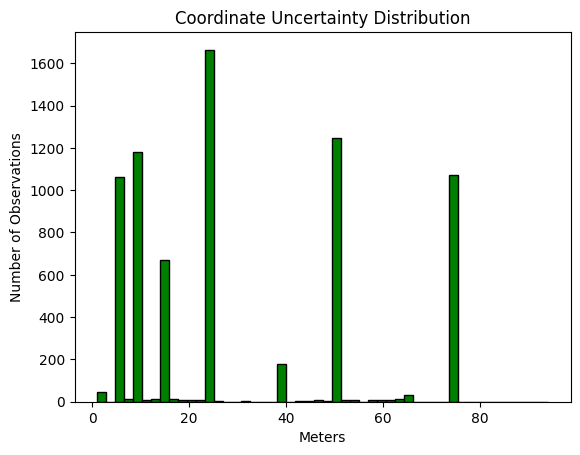

In [177]:
import matplotlib.pyplot as plt
# Basic histogram
plt.hist(df_train[df_train['coorUncert'] < 100]['coorUncert'], bins=50, color='green', edgecolor='black')

# Add labels
plt.title('Coordinate Uncertainty Distribution')
plt.xlabel('Meters')
plt.ylabel('Number of Observations')

# Show plot
plt.show()

In [178]:
import pandas as pd
import numpy as np

# Fill missing values using median of low-uncertainty observations (<50m)
median_low_uncert = df_train[df_train['coorUncert'] < 50]['coorUncert'].median()
df_train['coorUncert'] = df_train['coorUncert'].fillna(median_low_uncert)


In [179]:
df_train['coorUncert'].isna().sum()

0

In [180]:
df_train.isna().sum()

eventDate                  0
year                       0
month                      0
day                        0
habitat                    0
countryCode                0
scientificName             0
kingdom                    0
phylum                     0
class                      0
order                      0
family                     0
genus                      0
specificEpithet            0
hasCoordinate              0
species                    0
iucnRedListCategory        0
substrate                  0
latitude                   0
longitude                  0
coorUncert                 0
observationID              0
region                    70
district                 107
filename                   0
category_id                0
metaSubstrate              0
poisonous                  0
elevation                 97
landcover                103
biogeographicalRegion    151
dtype: int64

In [181]:
# now for region column
df_train['region'].dtype

dtype('O')

In [182]:
df_train['region'].nunique()

75

In [183]:
df_train['region'].unique()

array(['Sjælland', 'Hovedstaden', 'Midtjylland', 'Nordjylland',
       'Eastern Finland', 'Syddanmark', 'Dalarna',
       'Thessaly and Central Greece', 'Västra Götaland', 'Oppland',
       'Toscana', 'Western Finland', 'Nord-Trøndelag', 'Occitanie',
       'Qaasuitsup', 'Svalbard', 'Cataluña', 'Värmland', 'Victoria',
       'England', 'Lazio', 'Hordaland', 'Sermersooq', 'Kalmar', nan,
       'Moyen-Ogooué', 'Bayern', 'Středočeský', 'Tasmania', 'Suðurland',
       'Islas Baleares', 'British Columbia', 'Sør-Trøndelag',
       'Norrbotten', 'Mukono', 'Uppsala', 'Blekinge', 'Lubuskie',
       'Lisboa', 'Puntarenas', 'Islas Canarias', 'Troms', 'Fryslân',
       'Pazardzhik', 'Västernorrland', 'Niedersachsen', 'Saint-Pierre',
       'Trentino-Alto Adige', 'Gotland', 'Vestfold', 'Apulia', 'Oulu',
       "Provence-Alpes-Côte d'Azur", 'Prague', 'Crete', 'Veneto',
       'Halland', 'Plzeňský', 'Jihočeský', 'Bourgogne-Franche-Comté',
       'Skåne', 'Jönköping', 'Leningrad', 'Oslo', 'New South W

In [184]:
df_train[['region','latitude','longitude','district']].head(20)

,region,latitude,longitude,district
0,Sjælland,55.227983,11.680016,Næstved
1,Hovedstaden,56.087201,12.215145,Gribskov
2,Hovedstaden,56.087201,12.215145,Gribskov
3,Hovedstaden,56.087201,12.215145,Gribskov
4,Hovedstaden,56.087201,12.215145,Gribskov
5,Hovedstaden,56.087201,12.215145,Gribskov
6,Hovedstaden,56.087201,12.215145,Gribskov
7,Hovedstaden,56.087201,12.215145,Gribskov
8,Hovedstaden,56.087201,12.215145,Gribskov
9,Hovedstaden,56.087201,12.215145,Gribskov


In [185]:
# region, district, latitude, and longitude are closely related. The best approach to fill the missing region values would be KNN
# The KNN model will find the closest geographic neighbors to determine the most likely region
from sklearn.neighbors import KNeighborsClassifier

# Filter to rows with coordinates and known region
coord_data = df_train.dropna(subset=['latitude', 'longitude', 'region'])

# Train a KNN model on the coordinates
X = coord_data[['latitude', 'longitude']]
y = coord_data['region']
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Predict region for rows with missing region but valid coordinates
missing_region_with_coords = df_train[df_train['region'].isna() & 
                                    df_train['latitude'].notna() & 
                                    df_train['longitude'].notna()]

if len(missing_region_with_coords) > 0:
    predictions = knn.predict(missing_region_with_coords[['latitude', 'longitude']])
    df_train.loc[missing_region_with_coords.index, 'region'] = predictions

In [186]:
df_train['region'].isna().sum()

0

In [187]:
df_train.isna().sum()

eventDate                  0
year                       0
month                      0
day                        0
habitat                    0
countryCode                0
scientificName             0
kingdom                    0
phylum                     0
class                      0
order                      0
family                     0
genus                      0
specificEpithet            0
hasCoordinate              0
species                    0
iucnRedListCategory        0
substrate                  0
latitude                   0
longitude                  0
coorUncert                 0
observationID              0
region                     0
district                 107
filename                   0
category_id                0
metaSubstrate              0
poisonous                  0
elevation                 97
landcover                103
biogeographicalRegion    151
dtype: int64

In [188]:
# now for the district column, 
df_train['district'].dtype

dtype('O')

In [189]:
df_train['district'].unique()

array(['Næstved', 'Gribskov', 'Vordingborg', 'Århus', 'Rudersdal',
       'Hjørring', 'Hillerød', 'Guldborgsund', 'Syddjurs',
       'North Karelia', 'København', 'Lemvig', 'Gentofte', 'Tønder',
       'Faxe', 'Ikast-Brande', 'Gladsaxe', 'Svendborg', 'Aalborg',
       'Frederiksberg', 'Lyngby-Taarbæk', 'Kalundborg', 'Orsa',
       'Høje Taastrup', 'Bornholm', 'Køge', 'Samsø', 'Helsingør',
       'Thisted', 'Thessaly', 'Nordfyns', 'Ringkøbing-Skjern', 'Lysekil',
       'Vågå', 'Arezzo', 'Kolding', 'Frederikshavn', 'Roskilde',
       'Skanderborg', 'Varde', 'Vejle', 'Skive', 'Silkeborg',
       'Jammerbugt', 'Furesø', 'Vesthimmerland', 'Lejre', 'Albertslund',
       'Mariagerfjord', 'Viborg', 'Stevns', 'Sorø', 'Rebild', 'Odder',
       'Læsø', 'Sønderborg', 'Herning', 'Slagelse', 'Odense', 'Lolland',
       'Billund', 'Ringsted', 'Randers', 'Glostrup', 'Norddjurs',
       'Halsnæs', 'Tavastia Proper', 'Faaborg-Midtfyn', 'Steinkjer',
       'Götene', 'Mariestad', 'Horsens', 'Tårnby', 'Pyr

In [190]:
df_train['district'].nunique()

205

In [191]:
df_train[['district','region','latitude','longitude']].head(20)

,district,region,latitude,longitude
0,Næstved,Sjælland,55.227983,11.680016
1,Gribskov,Hovedstaden,56.087201,12.215145
2,Gribskov,Hovedstaden,56.087201,12.215145
3,Gribskov,Hovedstaden,56.087201,12.215145
4,Gribskov,Hovedstaden,56.087201,12.215145
5,Gribskov,Hovedstaden,56.087201,12.215145
6,Gribskov,Hovedstaden,56.087201,12.215145
7,Gribskov,Hovedstaden,56.087201,12.215145
8,Gribskov,Hovedstaden,56.087201,12.215145
9,Gribskov,Hovedstaden,56.087201,12.215145


In [192]:
# trying using region and exact coordinates matches
# Find exact coordinate matches
for idx in df_train[df_train['district'].isna()].index:
    lat = df_train.loc[idx, 'latitude']
    lon = df_train.loc[idx, 'longitude']
    region = df_train.loc[idx, 'region']
    
    # Look for exact coordinate matches
    matches = df_train[(df_train['latitude'] == lat) & 
                       (df_train['longitude'] == lon) & 
                       (df_train['district'].notna())]
    
    if len(matches) > 0:
        df_train.loc[idx, 'district'] = matches['district'].iloc[0]

In [193]:
df_train['district'].isna().sum()

107

In [194]:
# use region to determine district (for remaining missing values)
region_to_district = {}
for region in df_train['region'].unique():
    if pd.isna(region):
        continue
    
    districts = df_train[df_train['region'] == region]['district'].dropna()
    
    if len(districts) > 0:
        # Get most common district in this region
        most_common_district = districts.value_counts().idxmax()
        region_to_district[region] = most_common_district

# Fill missing districts based on region
for idx in df_train[df_train['district'].isna()].index:
    region = df_train.loc[idx, 'region']
    
    if pd.notna(region) and region in region_to_district:
        df_train.loc[idx, 'district'] = region_to_district[region]

In [195]:
df_train['district'].isna().sum()

37

In [196]:
# // using knn for still missing values
still_missing = df_train[df_train['district'].isna()]
if len(still_missing) > 0 and len(df_train.dropna(subset=['latitude', 'longitude', 'district'])) > 0:
    from sklearn.neighbors import KNeighborsClassifier
    
    # Prepare training data
    train_data = df_train.dropna(subset=['latitude', 'longitude', 'district'])
    X_train = train_data[['latitude', 'longitude']]
    y_train = train_data['district']
    
    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    
    # Predict for missing values
    missing_with_coords = df_train[df_train['district'].isna() & 
                                  df_train['latitude'].notna() & 
                                  df_train['longitude'].notna()]
    
    if len(missing_with_coords) > 0:
        X_missing = missing_with_coords[['latitude', 'longitude']]
        predictions = knn.predict(X_missing)
        df_train.loc[missing_with_coords.index, 'district'] = predictions

In [197]:
df_train['district'].isna().sum()

0

In [198]:
df_train.isna().sum()

eventDate                  0
year                       0
month                      0
day                        0
habitat                    0
countryCode                0
scientificName             0
kingdom                    0
phylum                     0
class                      0
order                      0
family                     0
genus                      0
specificEpithet            0
hasCoordinate              0
species                    0
iucnRedListCategory        0
substrate                  0
latitude                   0
longitude                  0
coorUncert                 0
observationID              0
region                     0
district                   0
filename                   0
category_id                0
metaSubstrate              0
poisonous                  0
elevation                 97
landcover                103
biogeographicalRegion    151
dtype: int64

In [199]:
# now for the elevation column
df_train['elevation'].dtype

dtype('float64')

In [200]:
df_train['elevation'].describe()

count    7722.000000
mean       72.065754
std       163.440745
min         0.000000
25%         0.000000
50%        14.000000
75%        68.000000
max      1600.000000
Name: elevation, dtype: float64

In [201]:
df_train.columns

Index(['eventDate', 'year', 'month', 'day', 'habitat', 'countryCode',
       'scientificName', 'kingdom', 'phylum', 'class', 'order', 'family',
       'genus', 'specificEpithet', 'hasCoordinate', 'species',
       'iucnRedListCategory', 'substrate', 'latitude', 'longitude',
       'coorUncert', 'observationID', 'region', 'district', 'filename',
       'category_id', 'metaSubstrate', 'poisonous', 'elevation', 'landcover',
       'biogeographicalRegion'],
      dtype='object')

In [202]:
df_train.isnull().sum()

eventDate                  0
year                       0
month                      0
day                        0
habitat                    0
countryCode                0
scientificName             0
kingdom                    0
phylum                     0
class                      0
order                      0
family                     0
genus                      0
specificEpithet            0
hasCoordinate              0
species                    0
iucnRedListCategory        0
substrate                  0
latitude                   0
longitude                  0
coorUncert                 0
observationID              0
region                     0
district                   0
filename                   0
category_id                0
metaSubstrate              0
poisonous                  0
elevation                 97
landcover                103
biogeographicalRegion    151
dtype: int64

In [203]:
# fikrstly treating biogeographhical region , it has 151 missing values s
df_train['biogeographicalRegion'].nunique()

7

In [204]:
df_train['biogeographicalRegion'].unique()

array(['continental', 'boreal', 'atlantic', 'mediterranean', 'alpine',
       nan, 'arctic', 'macaronesia'], dtype=object)

In [208]:
df_train[['biogeographicalRegion','latitude','longitude','region']].sample(20)

,biogeographicalRegion,latitude,longitude,region
7022,continental,57.014550,9.914370,Nordjylland
6724,continental,55.744953,12.583444,Hovedstaden
5677,atlantic,55.681516,8.179708,Syddanmark
917,continental,55.789147,12.548053,Hovedstaden
5672,continental,55.707095,11.841309,Sjælland
463,continental,56.892433,10.171070,Nordjylland
1736,continental,55.929644,12.361133,Hovedstaden
5372,atlantic,55.955303,9.000658,Midtjylland
6335,continental,55.552634,11.883789,Sjælland
2280,continental,54.724245,10.692495,Syddanmark


In [209]:
"""To fill missing values in the biogeographical Region column, we can use a combination of geographical and ecological information.
Based on the unique values (continental, boreal, atlantic, mediterranean, alpine, arctic, macaronesia), this is clearly a classification of ecological zones.
"""

# 1. Use coordinates to predict biogeographical region with KNN
from sklearn.neighbors import KNeighborsClassifier

# Filter to rows with coordinates and known biogeographical region
coord_data = df_train.dropna(subset=['latitude', 'longitude', 'biogeographicalRegion'])

# Train a KNN model
X = coord_data[['latitude', 'longitude']]
y = coord_data['biogeographicalRegion']
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Predict for missing values that have coordinates
missing_with_coords = df_train[df_train['biogeographicalRegion'].isna() & 
                              df_train['latitude'].notna() & 
                              df_train['longitude'].notna()]

if len(missing_with_coords) > 0:
    X_missing = missing_with_coords[['latitude', 'longitude']]
    predictions = knn.predict(X_missing)
    df_train.loc[missing_with_coords.index, 'biogeographicalRegion'] = predictions

In [210]:
df_train['biogeographicalRegion'].isna().sum()

0

In [211]:
#  now for elevation column
df_train['elevation'].dtype

dtype('float64')

In [212]:
df_train['elevation'].isna().sum()

97

In [213]:
df_train['elevation'].describe()

count    7722.000000
mean       72.065754
std       163.440745
min         0.000000
25%         0.000000
50%        14.000000
75%        68.000000
max      1600.000000
Name: elevation, dtype: float64

In [215]:
# Step 1: Calculate median elevation per region
region_medians = df_train.groupby('biogeographicalRegion')['elevation'].median()

# Step 2: Fill missing values with their region's median
df_train['elevation'] = df_train.groupby('biogeographicalRegion')['elevation'].transform(
    lambda x: x.fillna(x.median())
)

In [216]:
df_train['elevation'].isna().sum()

0

In [217]:
df_train.isna().sum()

eventDate                  0
year                       0
month                      0
day                        0
habitat                    0
countryCode                0
scientificName             0
kingdom                    0
phylum                     0
class                      0
order                      0
family                     0
genus                      0
specificEpithet            0
hasCoordinate              0
species                    0
iucnRedListCategory        0
substrate                  0
latitude                   0
longitude                  0
coorUncert                 0
observationID              0
region                     0
district                   0
filename                   0
category_id                0
metaSubstrate              0
poisonous                  0
elevation                  0
landcover                103
biogeographicalRegion      0
dtype: int64

In [218]:
#  now for landcover column
df_train['landcover'].dtype

dtype('float64')

In [219]:
df_train['landcover'].describe()

count    7716.000000
mean       11.714619
std         5.251739
min         0.000000
25%         8.000000
50%        12.000000
75%        17.000000
max        17.000000
Name: landcover, dtype: float64

In [220]:
df_train['landcover'].unique()

array([16., 17., 14., 10.,  1.,  9., 13.,  5., 12.,  8., 11., nan,  4.,
        0.])

In [221]:
# it's a float64 column with values ranging from 0 to 17, with a median of 12. This suggests it's  a coded categorical variable representing different land cover types (like forest, urban, agriculture, etc.) rather than a continuous value.
# Since landcover is typically determined by geographical location, the best approach would be using KNN
# 1. Use KNN with coordinates to predict landcover
from sklearn.neighbors import KNeighborsRegressor

# Filter to rows with coordinates and known landcover
coord_data = df_train.dropna(subset=['latitude', 'longitude', 'landcover'])

# Train a KNN model
X = coord_data[['latitude', 'longitude']]
y = coord_data['landcover']
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X, y)

# Predict for missing values that have coordinates
missing_with_coords = df_train[df_train['landcover'].isna() & 
                              df_train['latitude'].notna() & 
                              df_train['longitude'].notna()]

if len(missing_with_coords) > 0:
    X_missing = missing_with_coords[['latitude', 'longitude']]
    predictions = knn.predict(X_missing)
    # Round to nearest landcover code since these appear to be discrete values
    df_train.loc[missing_with_coords.index, 'landcover'] = np.round(predictions)

In [222]:
df_train['landcover'].isna().sum()

0

In [223]:
df_train.isna().sum()

eventDate                0
year                     0
month                    0
day                      0
habitat                  0
countryCode              0
scientificName           0
kingdom                  0
phylum                   0
class                    0
order                    0
family                   0
genus                    0
specificEpithet          0
hasCoordinate            0
species                  0
iucnRedListCategory      0
substrate                0
latitude                 0
longitude                0
coorUncert               0
observationID            0
region                   0
district                 0
filename                 0
category_id              0
metaSubstrate            0
poisonous                0
elevation                0
landcover                0
biogeographicalRegion    0
dtype: int64